Epoch 1/10
6231/6231 [==============================] - 42s 6ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 2/10
6231/6231 [==============================] - 36s 6ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 3/10
6231/6231 [==============================] - 41s 7ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 4/10
6231/6231 [==============================] - 38s 6ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 5/10
6231/6231 [==============================] - 53s 8ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/10
6231/6231 [==============================] - 36s 6ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0023 - val_accuracy: 0.9994
Epoch 7/10
6231/6231 [==============================] - 34s 5ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0027 - val_ac

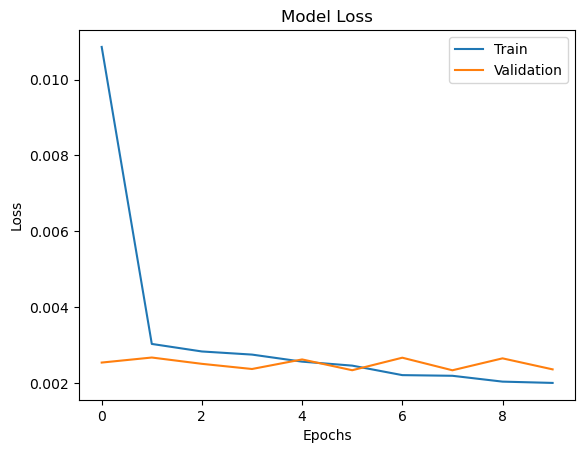

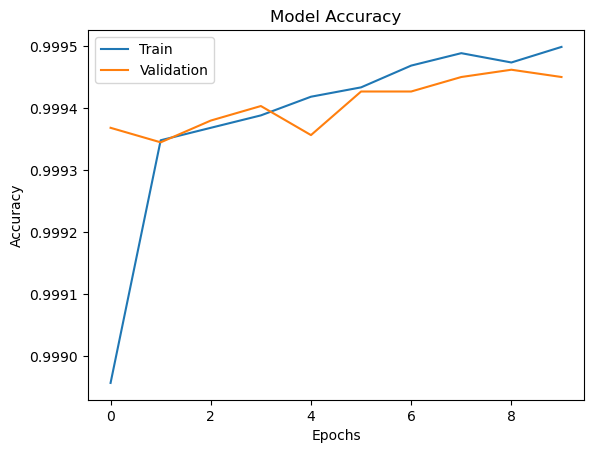

In [1]:
#train with rnns model
#LSTM is a type of recurrent neural network (RNN) architecture

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# Drop the Time column
df.drop('Time', axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# One-hot encode the Class column
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# Normalize the Amount column using z-score normalization
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Separate features and target
X = df.drop('Class_1', axis=1)
y = df['Class_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 29), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy*100:.3f}%')

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


Epoch 1/10
6231/6231 [==============================] - 40s 6ms/step - loss: 0.0112 - accuracy: 0.9989 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 2/10
6231/6231 [==============================] - 35s 6ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9993
Epoch 3/10
6231/6231 [==============================] - 33s 5ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9995
Epoch 4/10
6231/6231 [==============================] - 36s 6ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0024 - val_accuracy: 0.9994
Epoch 5/10
6231/6231 [==============================] - 34s 5ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9994
Epoch 6/10
6231/6231 [==============================] - 35s 6ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 7/10
6231/6231 [==============================] - 34s 6ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0024 - val_ac

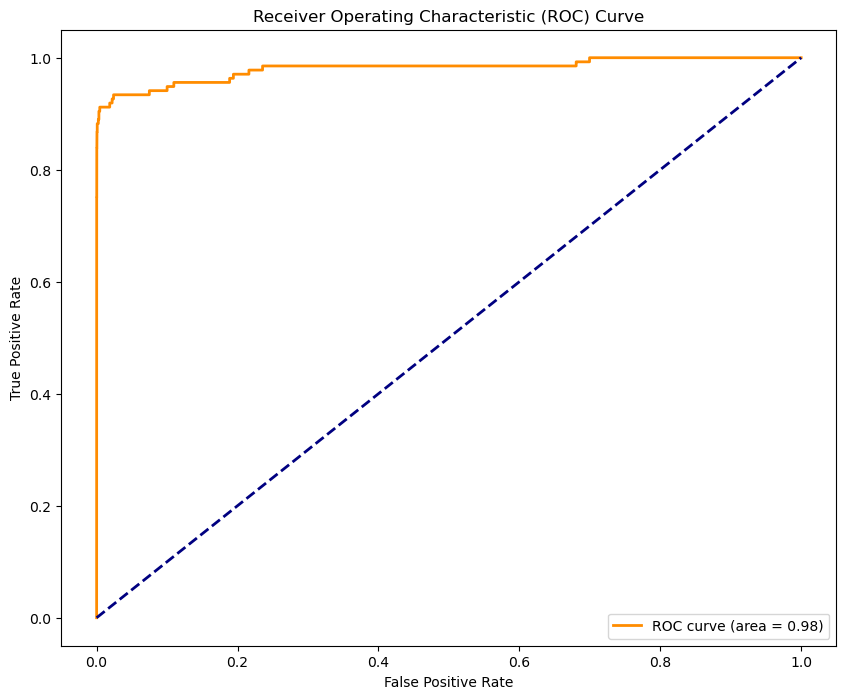

In [2]:
#create a plot of the ROC curve for the model, with the AUC(area under the curbe) score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# Load the dataset
df = pd.read_csv(r'C:\Users\nh013\Desktop\creditcard.csv\creditcard.csv')

# Drop the Time column
df.drop('Time', axis=1, inplace=True)

# Handle missing values
df.dropna(inplace=True)

# One-hot encode the Class column
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

# Normalize the Amount column using z-score normalization
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Separate features and target
X = df.drop('Class_1', axis=1)
y = df['Class_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 29), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy*100:.3f}%')

# Calculate the predicted probabilities
y_prob = model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
